In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
erp = pd.read_csv("erp.csv",  sep=";") 
liaison = pd.read_csv("liaison.csv",  sep=";")
web = pd.read_csv("web.csv",  sep=";")

### 1 - Nettoyage des jeu de données

In [2]:
# Renomme la colonne sku pour avoir une concordance avec les autres data frames si besoin.
web.rename(columns={'sku' : 'id_web'}, inplace=True)

In [3]:
erp.dtypes

product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object

In [4]:
erp['price']

0      24,2
1      34,3
2      20,8
3      14,1
4        46
       ... 
820      45
821      45
822    54,8
823    26,5
824    16,3
Name: price, Length: 825, dtype: object

In [5]:
# Correction du types de données de la colonne price
erp['price'] = erp['price'].str.replace(',','.')
erp['price']= pd.to_numeric(erp['price'])
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [6]:
web.dtypes

id_web                    object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

In [35]:
web['post_type'].unique()

array(['product', nan, 'attachment'], dtype=object)

In [7]:
# On isole les lignes pour lequel le post fait reference a un produit
web_prod = web.loc[web['post_type']=='product']
web_prod.isna().sum()

id_web                     2
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                716
post_author                0
post_date                  0
post_date_gmt              0
post_content             716
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            716
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    716
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           716
comment_count              0
dtype: int64

In [8]:
# Visualisation des données que nous avons
web_prod.shape

(716, 28)

In [9]:
# Suppression des colonnes où il y a 100% de données manquantes
web_prod.dropna(how='all',axis=1,inplace=True)
web_prod.isna().sum()

C:\Users\Salem\Python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


id_web               2
virtual              0
downloadable         0
rating_count         0
average_rating       0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
post_parent          0
guid                 0
menu_order           0
post_type            0
comment_count        0
dtype: int64

In [10]:
idweb_na = web_prod.loc[web_prod['id_web'].isna()]
idweb_na

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


Ici, nous avons la présence de deux valeurs manquantes, il nous est impossible de determiné leur id_web par manque d'information.

C'est pourquoi, nous stockons ces deux données dans une variable pour pouvoir les transmettre au service chargé d'extraire les données du site, afin de voir à quoi correspondent ces valeurs manquantes.

Cela pourrais correspondre a des produits qui ne sont plus en ventes a l'heure actuelle sur le site.

In [11]:
# Suppression des valeurs manquantes presente dans id_web
web_prod.dropna(inplace=True)

C:\Users\Salem\Python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
web_prod.shape

(714, 23)

In [13]:
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [14]:
# Visualisation des données manquantes presente dans le dataframes liaison 
liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [15]:
# Les lignes où id web est une valeur manquantes dans le dataframe liaison
liaison.loc[liaison['id_web'].isna()]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


Il n'y a pas moyen de trouver une quelconque relation permettant de lié les valeurs manquante au product_id 

On peut garder les valeurs manquantes qui se supprimerons apres un possible merge

De meme que précédement nous allons stocker ces donnée dans une variable afin de transmettre celle ci au service compétant qui pourront nous expliquer pourquoi certains produit n'ont pas leur concordance sur le site.

Cela pourrait s'expliquer par la simple raison que certains produit ce vend uniquement en physique.



In [16]:
liaison_na = liaison.loc[liaison['id_web'].isna()]

### 2 - Merge et rapprochement

Nous devons maintenant faire le rapprochement entre les differents dataframes, pour cela on utilise .merge pour faire la jointure entre plusieurs table.

Pour savoir qu'elle merge nous allons utiliser pour la jointure entre erp et liaison, nous allons faire des test grâce au parametre indicator=True de la methode .merge entre un merge left et un merge outer qui nous permettra de voir si le product id est present dans les deux data frames et pour savoir ensuite qu'elle jointure nous garderons

In [17]:
# Test d'un merge outer des data frames erp et liaison 
erp_liai_test1 = pd.merge(erp,liaison, on='product_id', how='outer',indicator= True)
erp_liai_test1

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [18]:
erp_liai_test1['_merge'].describe()

count      825
unique       1
top       both
freq       825
Name: _merge, dtype: object

In [19]:
# Test d'un merge left des data frames erp et liaison
erp_liai_test2 = pd.merge(erp, liaison, on='product_id',how='left',indicator=True)
erp_liai_test2['_merge'].describe()

count      825
unique       1
top       both
freq       825
Name: _merge, dtype: object

Nous remarquons ici, que peut importe qu'elle jointure nous utilisons, nous trouvons la même concordance 

In [20]:
# Supression de la colonne _merge qui nous permettais de faire le test
erp_liaison = erp_liai_test1.drop(['_merge'],axis = 1)
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [21]:
erp_liaison.shape

(825, 6)

In [22]:
web_prod.shape

(714, 23)

Nous allons maintenant faire un merge entre les dataframes web_prod et erp_liaison. 

A l'aide des .shapes ci dessus, on remarque la presence d'une difference de 91 lignes, soit le nombre de ligne avec des valeurs manquante que nous avons stocker precédemment dans une variable.

N'ayant pas plus d'information, j'estime que ces données ne sont pas nécéssaires pour poursuivre le reste du rapprochement donc je decide de les exclure en faisant un merge inner afin de garder uniquement les lignes pour lesquels id_web est present a la fois dans le dataframe erp_liaison et web_prod

In [23]:
# Merge Inner des data frames erp_liaison et web_prod
df1 = pd.merge(web_prod, erp_liaison , on='id_web',how='inner')
df1.shape

(714, 28)

### 3 - Etude du chiffre d'affaires

In [24]:
# Visualisation des colonnes utilise a notre analyse
df1[['id_web','product_id','total_sales','price']]

,id_web,product_id,total_sales,price
0,bon-cadeau-25-euros,4954,10.0,25.0
1,15298,3847,6.0,24.2
2,15296,3849,0.0,34.3
3,15300,3850,0.0,20.8
4,19814,4032,3.0,14.1
...,...,...,...,...
709,16135,6930,5.0,8.4
710,15891,7023,0.0,27.5
711,15887,7025,0.0,69.0
712,13127-1,7247,0.0,54.8


In [25]:
# Calcul du chiffre d'affaire par produit
CA_par_produit = df1['total_sales'] * df1['price']

In [26]:
# Ajout d'une colonne chiffre affaire par produit dans df1
df1['chiffre affaire par produit'] = CA_par_produit
df1[['id_web','product_id','total_sales','price','chiffre affaire par produit']]

,id_web,product_id,total_sales,price,chiffre affaire par produit
0,bon-cadeau-25-euros,4954,10.0,25.0,250.0
1,15298,3847,6.0,24.2,145.2
2,15296,3849,0.0,34.3,0.0
3,15300,3850,0.0,20.8,0.0
4,19814,4032,3.0,14.1,42.3
...,...,...,...,...,...
709,16135,6930,5.0,8.4,42.0
710,15891,7023,0.0,27.5,0.0
711,15887,7025,0.0,69.0,0.0
712,13127-1,7247,0.0,54.8,0.0


In [27]:
# Calcul du chiffre d'affaire total 
CA_total = df1['chiffre affaire par produit'].sum()
print('Le chiffre daffaire total réalisé en ligne est de ' + str(CA_total) + ' €')

Le chiffre daffaire total réalisé en ligne est de 70568.6 €


### 4 - Detection des valeurs abérrantes (outliers)

In [28]:
# IQR
Q1 = np.percentile(df1['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

28.050000000000004

In [29]:
# Position des Outliers
Max = Q3 + 1.5 * IQR
print(Max)
valeur_abérante = np.where(df1['price']>= Max )
print(valeur_abérante[0])

84.22500000000001
[ 64  66 200 202 206 219 220 222 223 228 381 382 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]


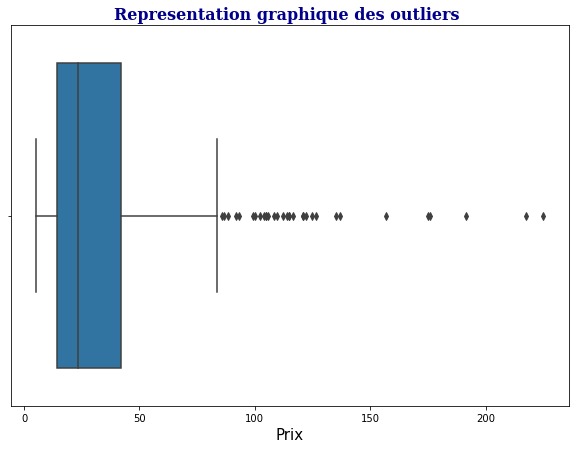

In [30]:
# Boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x= df1['price'])
plt.xlabel('Prix', fontsize=15)
plt.title("Representation graphique des outliers " , fontsize=16,
          fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})
plt.show()

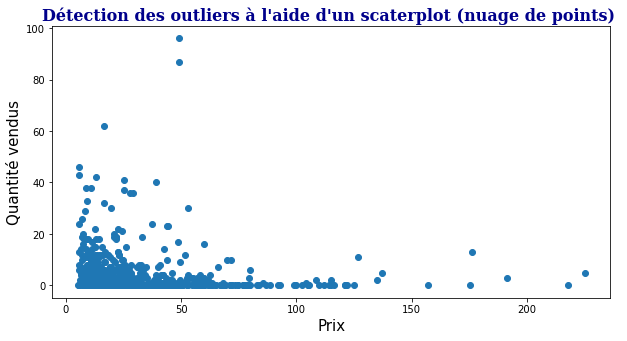

In [31]:
# Scatter plot
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df1['price'], df1['total_sales'])
plt.title("Détection des outliers à l'aide d'un scaterplot (nuage de points) " , fontsize=16,
          fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) 
ax.set_xlabel('Prix', fontsize=15)
ax.set_ylabel('Quantité vendus', fontsize=15)
plt.show()

In [32]:
print(np.where((df1['price']>80)))


(array([ 64,  66, 197, 200, 202, 206, 219, 220, 222, 223, 228, 381, 382,
       426, 431, 432, 437, 438, 502, 506, 511, 553, 587, 602, 603, 604,
       642, 647, 648, 653, 654, 655, 656, 657], dtype=int64),)


In [33]:
# Zscore : 
z = np.abs(stats.zscore(df1['price']))
print(z)

0      0.269624
1      0.298410
2      0.065016
3      0.420752
4      0.661837
         ...   
709    0.866939
710    0.179667
711    1.313620
712    0.802664
713    0.582675
Name: price, Length: 714, dtype: float64


In [34]:
#  Position des Outliers
print(np.where(z > 2))

(array([ 64,  66, 200, 202, 219, 220, 222, 223, 228, 381, 382, 426, 431,
       432, 437, 502, 511, 553, 587, 602, 603, 604, 642, 647, 648, 653,
       654, 655, 656, 657], dtype=int64),)


Généralement une valeur abérrante est une erreur liée a une possible erreur de frappe de l'homme ou de comprehension d'un quelconque transfère entre plusieurs logiciels. 

Pour notre cas, on remarque la présence de valeur abérrantes uniquement car il y a des livres qui sont beaucoup plus chère que d'autre. En soit ces valeurs ne peuvent pas etre considéré comme des outliers. 